<a href="https://colab.research.google.com/github/gulsung/VeriBilimi_1/blob/master/Regresyon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
#Çoklu dogrusal regresyon modeli eğitimi
#Kütüphaneyi içe aktar
import pandas as pd
import numpy as np

#Sklearn kütüphanesi içe aktar
from sklearn.linear_model import LinearRegression

In [29]:
#veriyi içe aktar 
df =pd.read_csv("coklu_dogrusal_regresyon_veriseti.csv",sep= ";")
df.head()

,deneyim,maas,yas
0,0.5,2500,22
1,0.0,2250,21
2,1.0,2750,23
3,5.0,8000,25
4,8.0,9000,28


In [30]:
x = df.iloc[:,[0,2]].values #deneyim ve yaşı bağımsız değişkenler olarak alalım
x

array([[ 0.5, 22. ],
       [ 0. , 21. ],
       [ 1. , 23. ],
       [ 5. , 25. ],
       [ 8. , 28. ],
       [ 4. , 23. ],
       [15. , 35. ],
       [ 7. , 29. ],
       [ 3. , 22. ],
       [ 2. , 23. ],
       [12. , 32. ],
       [10. , 30. ],
       [14. , 34. ],
       [ 6. , 27. ]])

In [31]:
y = df.maas.values.reshape(-1,1) #maas'i ise  bağımlı değişken olarak alalım
y

array([[ 2500],
       [ 2250],
       [ 2750],
       [ 8000],
       [ 9000],
       [ 6900],
       [20000],
       [ 8500],
       [ 6000],
       [ 3500],
       [15000],
       [13000],
       [18000],
       [ 7500]])

In [32]:
#Çoklu Doğrusal Regreston Modeli Eğitimi

#Çoklu Doğrusal Regreston Modeli
coklu_dogrusal_regresyon = LinearRegression()

#doğrusal regresyon eğitimi
coklu_dogrusal_regresyon.fit(x,y)

LinearRegression()

In [33]:
#test 1
test_verisi1 = np.array([[10,35]]) #deneyim = 10 ve yaş = 35
test_sonucu1 = coklu_dogrusal_regresyon.predict(test_verisi1)
print("10 yıllık deneyim ve 35 yaş sonucu çıkan maaş: {} TL".format(test_sonucu1[0]))

10 yıllık deneyim ve 35 yaş sonucu çıkan maaş: [11046.35815877] TL


In [34]:
#test 2
test_verisi2 = np.array([[5,35]]) 
test_sonucu2 = coklu_dogrusal_regresyon.predict(test_verisi2)
print("5 yıllık deneyim ve 35 yaş sonucu çıkan maaş: {} TL".format(test_sonucu2[0]))

5 yıllık deneyim ve 35 yaş sonucu çıkan maaş: [3418.85455609] TL


In [35]:
#Polinomsal regresyon
#Kütüphaneyi içe aktar
import pandas as pd
import matplotlib.pyplot as plt

#Sklearn kütüphanesi içe aktar
from sklearn.linear_model import LinearRegression #doğrusal
from sklearn.preprocessing import PolynomialFeatures #polinomsal

In [36]:
#veriyi içe aktar 
df =pd.read_csv("polinomsal_regresyon_veriseti.csv",sep= ";")
df.head()

,araba_fiyat,araba_max_hiz
0,60,180
1,70,180
2,80,200
3,100,200
4,120,200


In [37]:
#sklearn input olarak genelde numpy kabul eder
y = df.araba_max_hiz.values.reshape(-1,1) #numpy array'e çevir
x = df.araba_fiyat.values.reshape(-1,1) #numpy array'e çevir

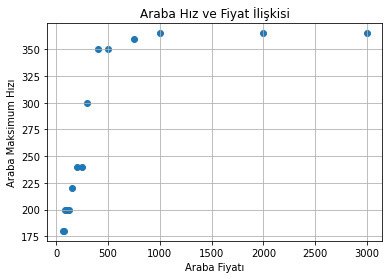

In [38]:
#veriyi görselleştir
plt.scatter(x,y)
plt.ylabel("Araba Maksimum Hızı")
plt.xlabel("Araba Fiyatı")
plt.title("Araba Hız ve Fiyat İlişkisi")
plt.grid(True)
plt.show()

In [39]:
#Doğrusal Regresyon Modeli Eğitimi
lr = LinearRegression()
#doğrusal regresyon eğitiöi
lr.fit(x,y)

LinearRegression()

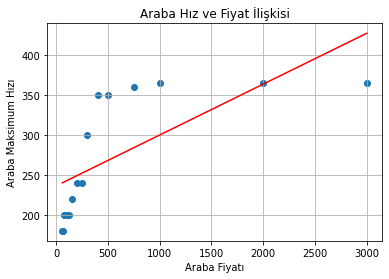

10 milyon tl lik araba hizi tahmibi:  [[871.66401826]]


In [40]:
#%% tahmib
y_tahmin = lr.predict(x)

plt.scatter(x,y)
plt.plot(x,y_tahmin,color="red")
plt.ylabel("Araba Maksimum Hızı")
plt.xlabel("Araba Fiyatı")
plt.title("Araba Hız ve Fiyat İlişkisi")
plt.grid(True)
plt.show()

araba_fiyatı = 10000
print("10 milyon tl lik araba hizi tahmibi: ", lr.predict((np.array([araba_fiyatı]).reshape(1,-1))))


In [41]:
#polinomsal regresyon = y = b0 + b1*x + b2*x^2 + b3*x^3 + ... + bn*x^n

#polinomsal özellikler
polinom_regresyon = PolynomialFeatures(degree = 4) #4.dereceden polinom

x_polinom = polinom_regresyon.fit_transform(x)
x_polinom
#çıktılar sırasıyla b0 + b1*x + b2*x^2 + b3*x^3 + ... + bn*x^n -> n=4 için

array([[1.0000000e+00, 6.0000000e+01, 3.6000000e+03, 2.1600000e+05,
        1.2960000e+07],
       [1.0000000e+00, 7.0000000e+01, 4.9000000e+03, 3.4300000e+05,
        2.4010000e+07],
       [1.0000000e+00, 8.0000000e+01, 6.4000000e+03, 5.1200000e+05,
        4.0960000e+07],
       [1.0000000e+00, 1.0000000e+02, 1.0000000e+04, 1.0000000e+06,
        1.0000000e+08],
       [1.0000000e+00, 1.2000000e+02, 1.4400000e+04, 1.7280000e+06,
        2.0736000e+08],
       [1.0000000e+00, 1.5000000e+02, 2.2500000e+04, 3.3750000e+06,
        5.0625000e+08],
       [1.0000000e+00, 2.0000000e+02, 4.0000000e+04, 8.0000000e+06,
        1.6000000e+09],
       [1.0000000e+00, 2.5000000e+02, 6.2500000e+04, 1.5625000e+07,
        3.9062500e+09],
       [1.0000000e+00, 3.0000000e+02, 9.0000000e+04, 2.7000000e+07,
        8.1000000e+09],
       [1.0000000e+00, 4.0000000e+02, 1.6000000e+05, 6.4000000e+07,
        2.5600000e+10],
       [1.0000000e+00, 5.0000000e+02, 2.5000000e+05, 1.2500000e+08,
        6.25

In [42]:
# %% polinomsal regresyon eğitebilmek için polinomsal özelllikler ile 
lr2 = LinearRegression()
lr2.fit(x_polinom, y)

LinearRegression()

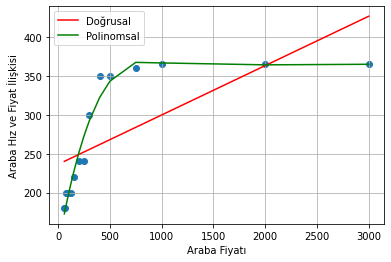

In [43]:
# tahmin
y_tahmin2 = lr2.predict(x_polinom)

plt.scatter(x,y)
plt.plot(x,y_tahmin,color="red", label = "Doğrusal")
plt.plot(x,y_tahmin2,color="green", label = "Polinomsal")
plt.legend()
plt.ylabel("Araba Maksimum Hızı")
plt.xlabel("Araba Fiyatı")
plt.ylabel("Araba Hız ve Fiyat İlişkisi")
plt.grid(True)
plt.show()

In [44]:
#Kütüphaneyi içe aktar
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Sklearn kütüphanesi içe aktar
from sklearn.linear_model import LinearRegression #doğrusal
from sklearn.preprocessing import PolynomialFeatures #polinomsal
from sklearn.metrics import r2_score #r kare

In [45]:
#veriyi içe aktar 
df =pd.read_csv("dogrusal_regresyon_veriseti.csv",sep= ";")
df.head()

,deneyim,maas
0,0.5,2500
1,0.0,2250
2,1.0,2750
3,5.0,8000
4,8.0,9000


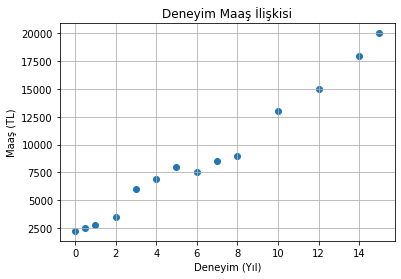

In [46]:
#veriyi görselleştir
plt.scatter(df.deneyim,df.maas)
plt.xlabel("Deneyim (Yıl)")
plt.ylabel("Maaş (TL)")
plt.title("Deneyim Maaş İlişkisi")
plt.grid(True)
plt.show()

In [47]:
#data içerisinde bulunan maas ve deneyim sütunlarını numpy array'e çevir
x = df.deneyim.values.reshape(-1,1)
y = df.maas.values.reshape(-1,1)

In [48]:
#Doğrusal Regresyon Modeli Eğitimi
#Doğrusal Regresyon Modeli
linear_reg = LinearRegression()

#doğrusal regresyon eğitimi
linear_reg.fit(x,y)

LinearRegression()

In [49]:
#polinomsal Regresyon modeli eğitimi
polinom_regresyon = PolynomialFeatures(degree = 2) #2.dereceden polinom

x_polinom = polinom_regresyon.fit_transform(x)

# %% polinomsal regresyon eğitebilmek için polinomsal özellikler ile 
poly_reg = LinearRegression()
poly_reg.fit(x_polinom, y)

LinearRegression()

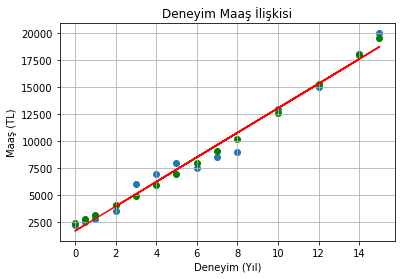

In [50]:
#test
y_tahmin_linear = linear_reg.predict(x)
y_tahmin_poly = poly_reg.predict(x_polinom)

plt.scatter(df.deneyim,df.maas)
plt.plot(x, y_tahmin_linear,color = "red", label = "Doğrusal")
plt.scatter(x, y_tahmin_poly,color = "green", label ="Polinomsal")
plt.xlabel("Deneyim (Yıl)")
plt.ylabel("Maaş (TL)")
plt.title("Deneyim Maaş İlişkisi")
plt.grid(True)
plt.show()

In [51]:
print("Doğrusal Regresyon R kare:{} ", r2_score(y,y_tahmin_linear))
print("Polinomsal Regresyon R kare:{}", r2_score(y,y_tahmin_poly))

Doğrusal Regresyon R kare:{}  0.9775283164949903
Polinomsal Regresyon R kare:{} 0.9854449464578782


In [52]:
#SINIFLANDIRMA

In [53]:
#Kütüphaneyi içe aktar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#uyarıları kapat
import warnings
warnings.filterwarnings("ignore")

In [54]:
#veriyi içe aktar 
df =pd.read_csv("ortopedik_hastaların_biyomekanik_özellikleri.csv")
df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal
